**Bi Variate Analysis**
- We already seen Uni Variate analysis
- We perform the categorical analysis
    - Frequency table (value counts)
    - Bar chart
    - Relative frequency table (Value counts Normalized form)
    - Pie chart
- We performed the numerical column analysis
    - Histogram
    - Distribution plot
    - Box plot
    - Outlier analysis
    - Filling the outliers
- Now we will do Categorical - Categorical analysis
- Numerical - Numerical analysis
- Categorical - Numerical analysis

***Categorical - Categorical analysis***
- lets consider two columns
    - continent
    - case_status

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df = pd.read_csv('Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [6]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**
- Find the Certified observations continent-wise
- Find the Denied observations continent-wise
  1. Make the first condition as continent=="Asia"
  2. Make the second condition as case_status=='Certified'
  3. Make the third condition as con1 & con_2
  4. Retrieve the data frame and take the count

In [9]:
con_1 = visa_df['continent'] =='Asia'
con_2 = visa_df['case_status'] == 'Certified'
con_3 = con_1 & con_2
len(visa_df[con_3])

11012

In [10]:
continent_uni = visa_df['continent'].unique()
continent_certified = []
for i in continent_uni:
    con_1 = visa_df['continent'] == i
    con_2 = visa_df['case_status'] == 'Certified'
    con_3 = con_1 & con_2
    continent_certified.append(len(visa_df[con_3]))

continent_certified

[11012, 397, 2037, 2957, 493, 122]

In [11]:
continent_uni = visa_df['continent'].unique()
continent_denied = []
for i in continent_uni:
    con_1 = visa_df['continent'] == i
    con_2 = visa_df['case_status'] == 'Denied'
    con_3 = con_1 & con_2
    continent_denied.append(len(visa_df[con_3]))

continent_denied

[5849, 154, 1255, 775, 359, 70]

In [12]:
continent_uni = visa_df['continent'].unique()
continent_certified_comb = []
continent_denied_comb = []
for i in continent_uni:
    con_1 = visa_df['continent'] == i
    con_2 = visa_df['case_status'] == 'Certified'
    con_3 = visa_df['continent'] == 'Denied'
    con_4 = con_1 & con_2
    con_5 = con_1 & con_2
    continent_certified_comb.append(len(visa_df[con_4]))
    continent_denied_comb.append(len(visa_df[con_5]))

continent_certified_comb

[11012, 397, 2037, 2957, 493, 122]

In [13]:
pd.DataFrame(zip(continent_certified,continent_denied))

,0,1
0,11012,5849
1,397,154
2,2037,1255
3,2957,775
4,493,359
5,122,70


**Cross Tab**
- The above data frame we can make by using the method: **ross Tab**
- It is available in pandas
- It takes two arguments
    - index
    - column
- In the above dataframe  index is: **Continents**
- In the above dataframe data column is: **Case_status**

In [15]:
pd.crosstab(visa_df['continent'],visa_df['case_status'])

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [16]:
idx_column = visa_df['continent']
data_column = visa_df['case_status']
df = pd.crosstab(idx_column,data_column)
df

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

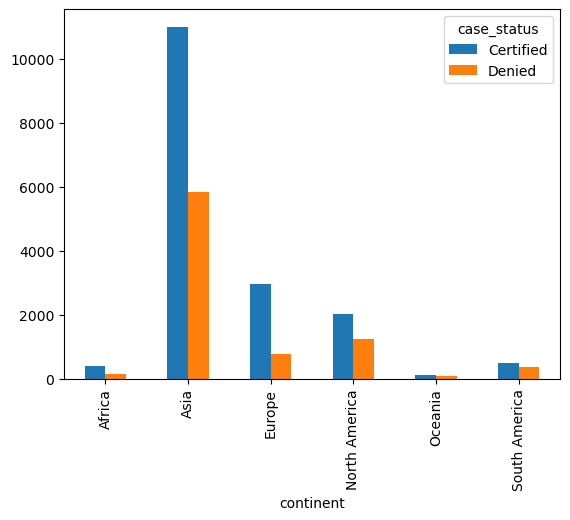

In [17]:
df.plot(kind = 'bar')

**Mulitvariate Analysis**
- Education 
- continent
- Case status
- we already know from asia there are 11k accepted visa
- in that i want further break down on education
- here also pd.cross tab
    - first fix your index any one column out of 3 column
    - then keep two column in a list and pass as data column

In [19]:
idx_column = visa_df['continent']
data_column = [visa_df['education_of_employee'],visa_df['case_status']]
df1 = pd.crosstab(idx_column,data_column)
df1

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

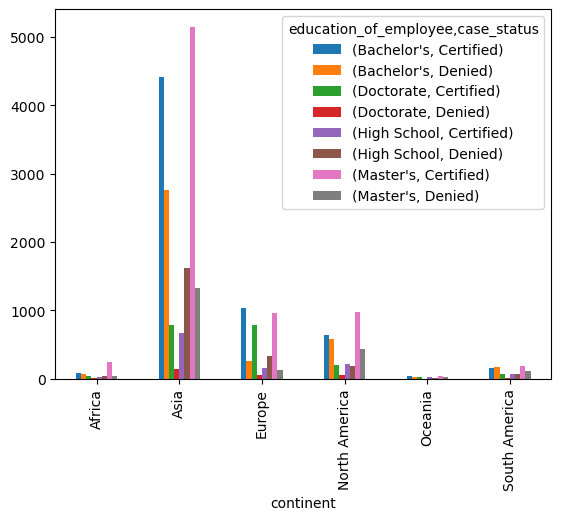

In [20]:
df1.plot(kind = 'bar')

In [38]:
idx_column = visa_df['continent']
data_column = [visa_df['case_status'],visa_df['education_of_employee']]
df2 = pd.crosstab(idx_column,data_column)
df2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [46]:
idx_column = visa_df['continent']
data_column =  [visa_df['education_of_employee'],visa_df['has_job_experience'],visa_df['case_status']]
df3 = pd.crosstab(idx_column,data_column)
df3

education_of_employee Bachelor's                         Doctorate         \
has_job_experience             N                Y                N          
case_status            Certified Denied Certified Denied Certified Denied   
continent                                                                   
Africa                        32     32        49     30        14      8   
Asia                        1495   1538      2912   1223       301    103   
Europe                       418    120       622    139       325     33   
North America                216    311       425    273        70     31   
Oceania                       18     14        20     14        10      2   
South America                 52    102       108     71        34     10   

education_of_employee                  High School                          \
has_job_experience            Y                  N                Y          
case_status           Certified Denied   Certified Denied Certified Denied   
continent                                                                    
Africa                       29      3           8     17        15     26   
Asia                        479     40         276    652       400    962   
Europe                      463     25          70    137        92    191   
North America               137     20          57    108       153     83   
Oceania                       9      1           5      9        14      8   
South America                41      4          26     31        48     32   

education_of_employee  Master's                          
has_job_experience            N                Y         
case_status           Certified Denied Certified Denied  
continent                                                
Africa                       79     27       171     11  
Asia                       1722    984      3427    347  
Europe                      388     85       579     45  
North America               298    257       681    172  
Oceania                      18     13        28      9  
South America                62     60       122     49

In [50]:
idx_column = visa_df['continent']
data_column =  [visa_df['education_of_employee'],visa_df['full_time_position'],visa_df['case_status']]
df4 = pd.crosstab(idx_column,data_column)
df4

education_of_employee Bachelor's                         Doctorate         \
full_time_position             N                Y                N          
case_status            Certified Denied Certified Denied Certified Denied   
continent                                                                   
Africa                         3      6        78     56         0      2   
Asia                         277    206      4130   2555        49      7   
Europe                        23     12      1017    247         2      1   
North America                 76     66       565    518        12      5   
Oceania                        4      1        34     27         1      1   
South America                  1      8       159    165         0      0   

education_of_employee                  High School                          \
full_time_position            Y                  N                Y          
case_status           Certified Denied   Certified Denied Certified Denied   
continent                                                                    
Africa                       43      9           0      2        23     41   
Asia                        731    136          34    113       642   1501   
Europe                      786     57           2     10       160    318   
North America               195     46          21     18       189    173   
Oceania                      18      2           1      0        18     17   
South America                75     14           3      2        71     61   

education_of_employee  Master's                          
full_time_position            N                Y         
case_status           Certified Denied Certified Denied  
continent                                                
Africa                       14      4       236     34  
Asia                        979    276      4170   1055  
Europe                       52     13       915    117  
North America               282     91       697    338  
Oceania                       6      4        40     18  
South America                13      4       171    105

In [52]:
idx_column = visa_df['continent']
data_column =  [visa_df['education_of_employee'],visa_df['case_status'],visa_df['full_time_position']]
df5 = pd.crosstab(idx_column,data_column)
df5

education_of_employee Bachelor's                    Doctorate              \
case_status            Certified       Denied       Certified      Denied   
full_time_position             N     Y      N     Y         N    Y      N   
continent                                                                   
Africa                         3    78      6    56         0   43      2   
Asia                         277  4130    206  2555        49  731      7   
Europe                        23  1017     12   247         2  786      1   
North America                 76   565     66   518        12  195      5   
Oceania                        4    34      1    27         1   18      1   
South America                  1   159      8   165         0   75      0   

education_of_employee      High School                    Master's        \
case_status                  Certified      Denied       Certified         
full_time_position       Y           N    Y      N     Y         N     Y   
continent                                                                  
Africa                   9           0   23      2    41        14   236   
Asia                   136          34  642    113  1501       979  4170   
Europe                  57           2  160     10   318        52   915   
North America           46          21  189     18   173       282   697   
Oceania                  2           1   18      0    17         6    40   
South America           14           3   71      2    61        13   171   

education_of_employee               
case_status           Denied        
full_time_position         N     Y  
continent                           
Africa                     4    34  
Asia                     276  1055  
Europe                    13   117  
North America             91   338  
Oceania                    4    18  
South America              4   105

In [56]:
idx_column = visa_df['education_of_employee']
data_column =  [visa_df['continent'],visa_df['case_status']]
df5 = pd.crosstab(idx_column,data_column)
df5

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109